In [ ]:
Problem 1  (make this a bit big in markodown)

In [114]:
library(lattice)
library(latticeExtra)
set.seed(2005)
n=100
eta=0.01
epsilon=1e-6
maxiter=10000

In [ ]:
Give the prabability equation to this in Markdown X~N(100,2) AND y~...

In [85]:
x=rnorm(n,1,sqrt(2))

In [87]:
y=rnorm(n,2+3*x,sqrt(5))

In [ ]:
Plot for the x,y data in markdown

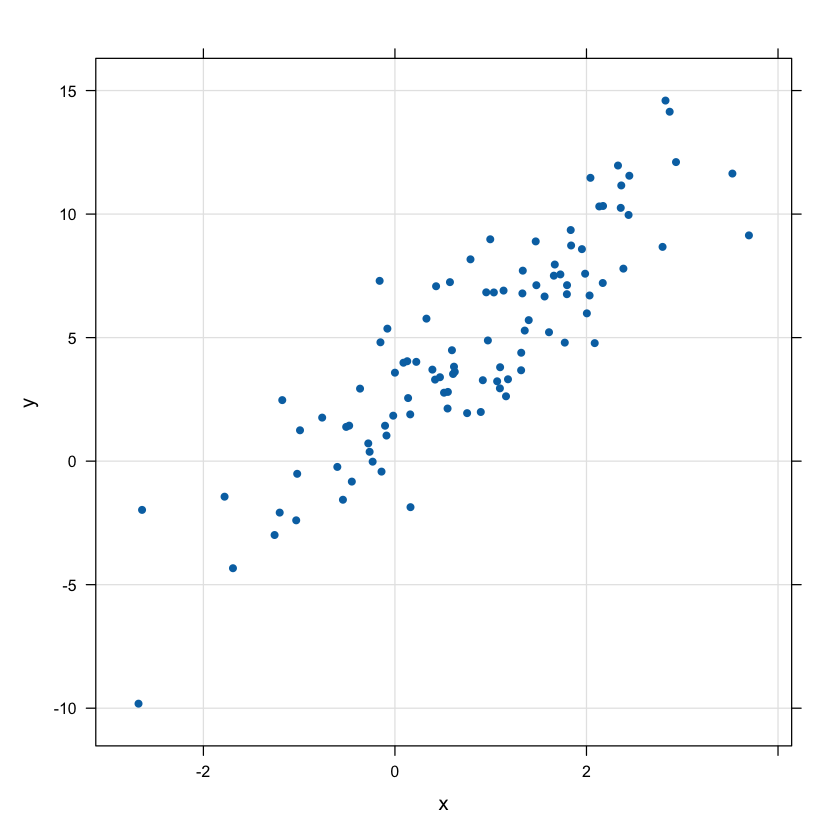

In [89]:
xyplot(y~x,grid=TRUE,pch=16)

In [ ]:
The following the code for the gradient descent

In [91]:
gradientDesc <- function(x, y, learn_rate, conv_threshold, n, max_iter) {
  # Initialize beta (vector for intercept and slope)
  beta <- c(0, 0)  # beta = [beta_0, beta_1]
  
  # Create design matrix X (with intercept term)
  X <- cbind(1, x)
  # Initial predictions and MSE
  yhat <- X %*% beta
  MSE <- sum((y - yhat)^2) / (2 * n)
  
  # Initialize history
  iterations <- 0
  mse_history <- numeric(max_iter)
  beta_history <- matrix(0, nrow = max_iter, ncol = 2)
  
  converged <- FALSE
  while (!converged) {
    # Compute gradient: grad = -(1/n) * X^T * (y - yhat)
    residuals <- y - yhat
    grad <- -t(X) %*% residuals / n
    
    # Update beta
    beta <- beta - learn_rate * grad
    
    # New predictions and MSE
    yhat <- X %*% beta
    MSE_new <- sum((y - yhat)^2) / (2 * n)
    
    # Store history
    mse_history[iterations + 1] <- MSE_new
    beta_history[iterations + 1, ] <- beta
    
    # Check convergence based on gradient norm
    grad_norm <- sqrt(sum(grad^2))
    if (grad_norm < conv_threshold) {
      converged <- TRUE
      cat("Optimal beta:", beta, "\n")
      cat("Iterations:", iterations, "\n")
      cat("Final MSE:", MSE_new, "\n")
      break
    }
    
    # Update MSE and iteration count
    MSE <- MSE_new
    iterations <- iterations + 1
    
    # Check max iterations
    if (iterations >= max_iter) {
      converged <- TRUE
      cat("Optimal beta:", beta, "\n")
      cat("Iterations:", iterations, "\n")
      cat("Final MSE:", MSE_new, "\n")
      break
    }
  }
  
  # Trim history
  mse_history <- mse_history[1:iterations]
  beta_history <- beta_history[1:iterations, ]
  
  # Return results
  return(list(beta = beta, mse = MSE_new, iterations = iterations,
              mse_history = mse_history, beta_history = beta_history))
}

In [93]:
result=gradientDesc(x,y,eta,epsilon,n,maxiter)

Optimal beta: 2.338394 2.928088 
Iterations: 2166 
Final MSE: 2.11967 


In [ ]:
Plot for the Loss vs iterations in markdown

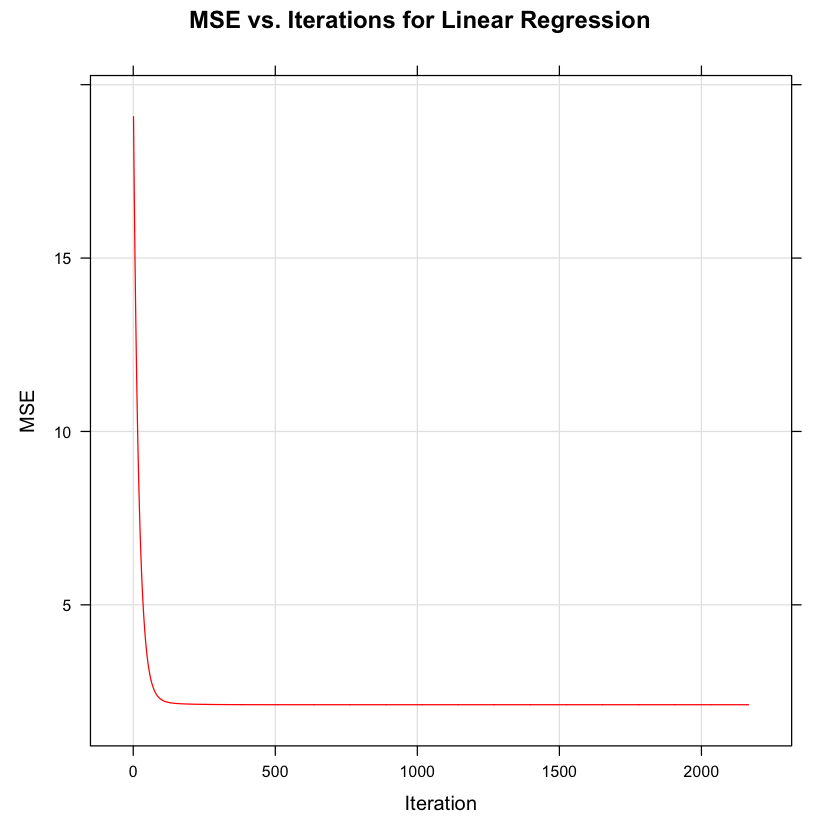

In [132]:

xyplot(result$mse_history ~ seq(1, result$iterations),  
             col = "red",
             type="l",
             grid = TRUE,
             xlab = "Iteration", 
             ylab = "MSE",
             main = "MSE vs. Iterations for Linear Regression")



In [ ]:
Plot for the path of descent in markdown

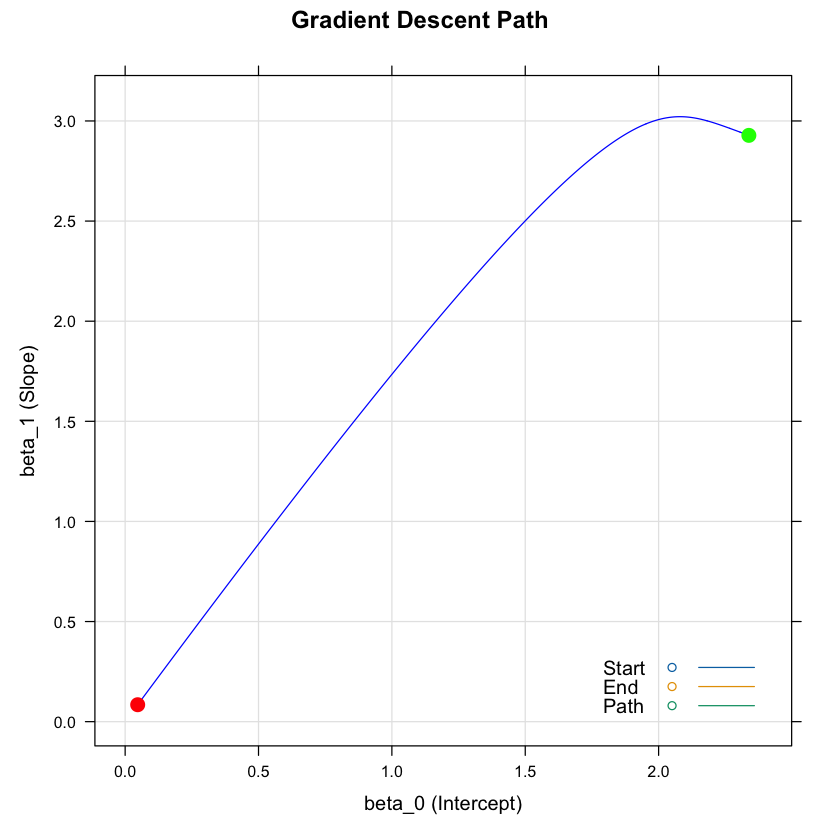

In [130]:

xyplot(result$beta_history[, 2] ~ result$beta_history[, 1], 
       type = "l", 
       col = "blue",
       grid = TRUE,
       xlab = "beta_0 (Intercept)", 
       ylab = "beta_1 (Slope)",
       main = "Gradient Descent Path",
       auto.key = list(
         corner = c(0.95, 0.05),
         text = c("Start", "End", "Path"),
         points = TRUE,
         lines = TRUE
       ),
       panel = function(x, y, ...) {
         panel.xyplot(x, y, ...)
         panel.points(x[1], y[1], col = "red", pch = 16, cex = 1.5)
         panel.points(x[result$iterations], y[result$iterations], col = "green", pch = 16, cex = 1.5)
       })


In [ ]:
The new regression plot with the values from gradient descent in markdown

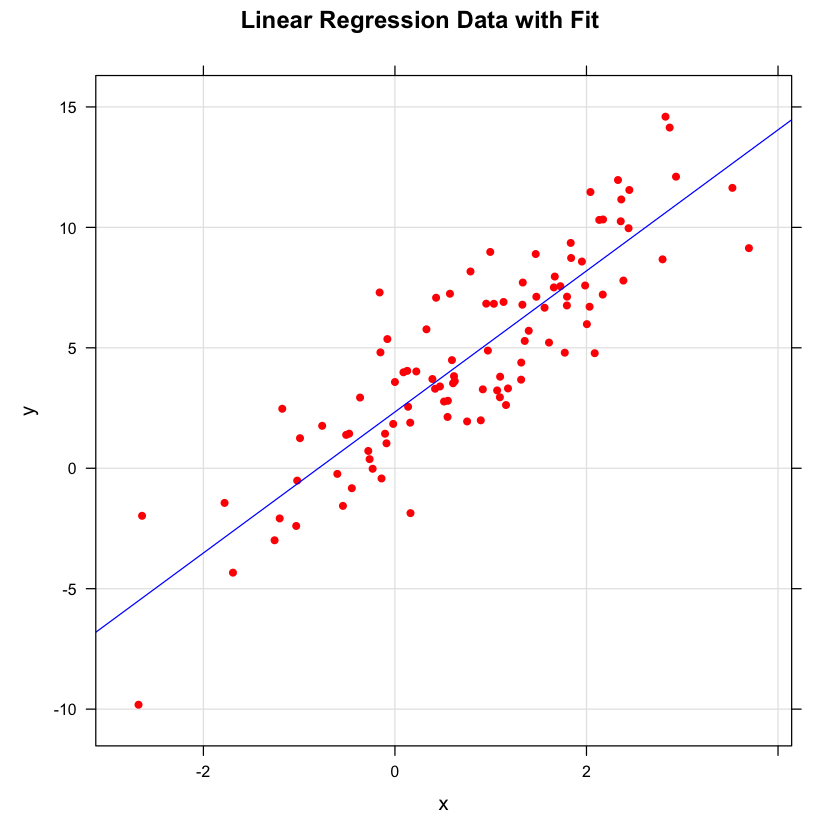

In [128]:
xyplot(y ~ x,
             grid = TRUE,
             pch = 16,
             col = "red",
             xlab = "x",
             ylab = "y",
             main = "Linear Regression Data with Fit",
             panel = function(...) {
               panel.xyplot(...)  # Draw scatter plot
               panel.abline(a = result$beta[1], b = result$beta[2], col = "blue")  # Add regression line
             })
